# Plotting in Python

---

## What does this cover?
1.  Quick plots (less flexibility)
2.  More advanced plots:  the `Figure` and `Axes` objects (ultimate flexibility)
3.  A few tips and tricks

... borrowing info from the [pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html) and [FAQ](https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

## Plotting library

* `matplotlib` is python's **mat**hematical **plot**ting **lib**rary

* `pyplot` contains the functions that mimic MATLAB's plotting library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

# (1) Quick plots

Basic plotting commands might seem familiar if you're used to MATLAB:

* `plt.plot()`

* `plt.contour()` and `plt.contourf()`

* `plt.scatter()`

* `plt.pcolor()` and `plt.pcolormesh()` (faster)

* `plt.hist()`

* ... and a LOT more; see the [gallery](https://matplotlib.org/gallery.html) to start with examples

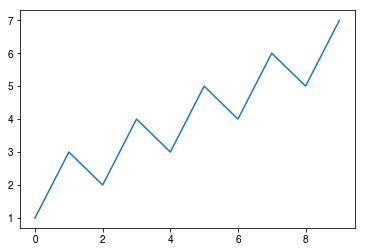

In [2]:
# simplest plot:  list of values
plt.plot([1,3,2,4,3,5,4,6,5,7]) # plot a list of values

In [3]:
# set up a few things to plot
a = np.array((1,2,3,4,5))
b = np.array((6,7,5,9,13))
c = np.random.rand(10,10) # 10x10 array with random numbers between 0 and 1

#### Add plot title and labels

Text(0.5,1,'Title')

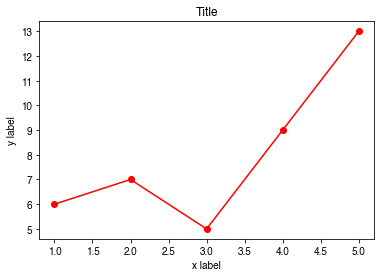

In [4]:
plt.plot(a, b, marker='o', color='red')
plt.ylabel('y label')
plt.xlabel('x label')
plt.title('Title')

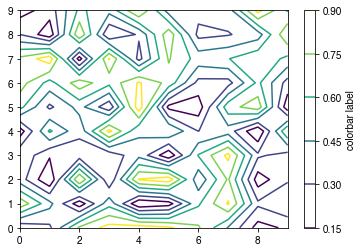

In [5]:
plt.contour(c)
#plt.contourf(c)
plt.colorbar(label='colorbar label')

### Colormaps in matplotlib (options [here](https://matplotlib.org/users/colormaps.html))

* The default colormap is `viridis`

* You can specify a `cmap=` in a contour plot.

* Reverse a colormap using `_r` behind the name, e.g., `cmap='viridis_r'`

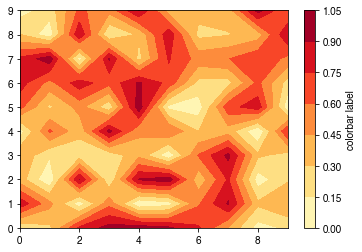

In [6]:
plt.contourf(c, cmap='YlOrRd')
plt.colorbar(label='colorbar label')

### Colors in matplotlib

Note pyplot accepts any [HTML named color](https://www.w3schools.com/colors/colors_groups.asp) as an option (case insensitive)

You can also specify any shade from white to black using a string between 0 and 1:

* `color='0'` is pure black

* `color='1'` is white

### Line widths/styles, colors, and markers

* Keywords like `linewidth` and `linestyle` and `color` (`lw`, `ls`, `c` for short) can be used to specify line properties, linestyle options [here](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)

* Add markers using `marker=`, style options [here](https://matplotlib.org/api/markers_api.html)

### Grids in plots

* Add a grid using `plt.grid()`

#### Specify x- and y-axis limits using `plt.xlim()` and `plt.ylim()`

Text(0,0.5,'y axis label')

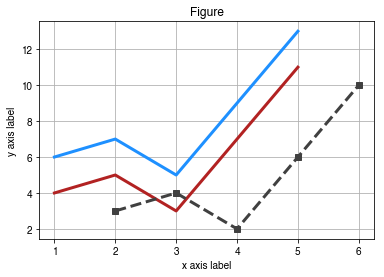

In [7]:
plt.plot(a, b, lw=3, color='dodgerblue')
plt.plot(a, b-2, lw=3, color='firebrick')
plt.plot(a+1, b-3, linewidth=3, linestyle='--', color='0.25', marker='s')

plt.grid()

plt.title('Figure')
plt.xlabel('x axis label')
plt.ylabel('y axis label')

#plt.xlim(-5,10)
#plt.ylim(0,20)

# (2) More advanced approach

* pyplot figures have four important **classes**, and to make publication-quality figures, it's good to know what's going on:

(1) `Figure`:  the whole thing (one or more Axes, all Artists, and the "canvas")

(2) `Axes`:  what you think about as the "plot" (belongs to `Figure`)

(3) `Axis`:  a given horizontal or vertical axis (helps set ticks and other details, belongs to `Axes`)

![Oops, figure not available](fig_map.png)

(4) `Artist`:  ALL the things you see in a figure (the `Figure`, `Axes`, and `Axis`, text, lines, etc.)

![Oops, figure not available](anatomy1.png)

# Recommended way to created figures

1. Create the `Figure` object using `plt.figure()` function (call it `fig`)

2. Add one or more `Axes` objects to `fig` (call them `ax`, `ax1`, `ax2`, etc.)

3. Use the `ax.plot()` syntax make plots

4. Mess with axis ticks, font sizes, text, etc. using methods that belong to the `Axes` class (documented [here](https://matplotlib.org/api/axes_api.html))

*Note:  In the "basic" plotting above, these steps are being done implicitly*

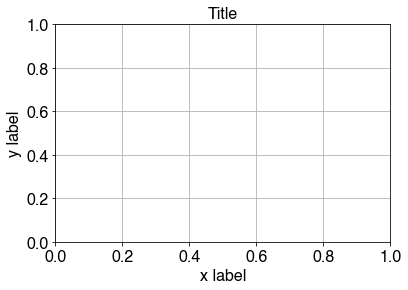

In [8]:
# 1
fig = plt.figure()

# 2
ax = fig.add_subplot(1,1,1) # (rows, columns, index)

# 3
#ax.plot(a, b, color='orangered', lw=3)

# 4
ax.grid()
ax.set_title('Title', fontsize=16)
ax.set_xlabel('x label', fontsize=16)
ax.set_ylabel('y label', fontsize=16)
ax.tick_params(labelsize=16)

## Worth knowing:  Several ways to instantiate a figure and axes

### (1) Basic:  Plotting command uses pyplot directly:  `plt.plot()`

#### Creates the figures and axes implicitly

    plt.plot()
    plt.scatter()
    ...

* You can get the current fig/ax objects using:

  * `fig = plt.gcf()`
  
  * `ax = plt.gca()`

* To change x and y limits, or set axes labels/title, use:

  * `plt.xlim()` and `plt.ylim()`
  
  * `plt.xlabel()`, `plt.ylabel()`, `plt.title()`

### (2) Advanced/recommended:  Plotting command uses an `Axes` object:  `ax.plot()`

#### You must create the `Figure` and `Axes` objects explicitly *beforehand* via either:

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) # (nrows, ncols, axes index)

**...or...**

    fig, axes = plt.subplots(1,1) # (nrows, ncols)
    
* To change x and y limits, or set axes labels/title, use:

  * `ax.set_xlim()`, `ax.set_ylim()`
  
  * `ax.set_xlabel()`, `ax.set_ylabel()`, `ax.set_title()`
  
* A lot of other things are the same... but you'll always encounter exceptions

### (3) Hybrid approach:  `plt.axes()`

### This will create the `Axes` object directly, though the `Figure` creation will be implicit

    ax = plt.axes()

* To get `fig`, you can use `fig = plt.gcf()`

Text(0.5,0,'x label')

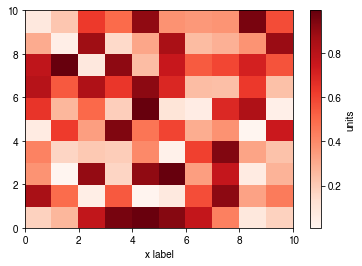

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # (rows, columns, index)
ax_plot = ax.pcolormesh(c, cmap='Reds')
plt.colorbar(ax_plot, label='units')

ax.set_xlabel('x label')

## Two ways to make a panel plot (e.g., 2x2)

### Best practice is to use the "advanced" fig/ax creation, since you can specify columns and rows

#### Use `ax = fig.add_subplot(rows, columns, plot)`

Notice how each set of axes is created individually using the (#,#,#) numbering syntax (starts at 1)

    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    ...
    ax1.plot()
    ...

#### Use `fig, ax_list = fig.subplots(rows, columns)`

This syntax creates `fig` and ALL axes at once, but in this case it places the axes into an array, `ax_array`:

    fig, ax_array = plt.subplots(2,2) # (rows, columns)
    ...
    ax_array[0,0].plot()
    ax_array[0,1].plot()
    ...

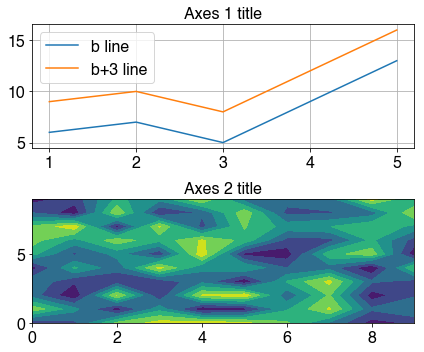

In [10]:
my_fontsize = 16

fig = plt.figure(figsize=(6,5))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(212) # commas not necessary if numbers are single digits

ax1.plot(a, b, label='b line') # add labels to lines to create legend
ax1.plot(a, b+3, label='b+3 line')
ax1.legend(fontsize=my_fontsize)

ax2.contourf(c)

ax1.grid()
ax1.set_title('Axes 1 title', fontsize=my_fontsize)
ax2.set_title('Axes 2 title', fontsize=my_fontsize)

ax1.tick_params(labelsize=my_fontsize)
ax2.tick_params(labelsize=my_fontsize)

fig.tight_layout()

# (3) Tips/tricks

### Figure size

* If you're making a figure for publications, you probably want the figure to be about 7.5 or 8.5 inches wide (full paper width) or half that for a single-column figure

* You can specify figure size (in inches) in one of two ways:
  1. **As you create the figure (8 in. wide, 4 in. tall):** `fig = plt.figure(figsize=(8,4))`
  
  2. **After you create the figure:** `fig.set_size_inches(8,4)`

### Tight layout

* Use `fig.tight_layout()` at the end of the figure to let matplotlib automatically space things out for you

### Saving figures

* Use `plt.savefig()` or `fig.savefig()`, documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html)
* Within the savefig() command, `bbox_inches='tight'` will crop the figure tightly, without margins
* Use the extension you prefer:  **png, pdf, ps, eps, svg** (a `dpi=` option will work with png, others are vector graphics)

### Figure insets

    fig, ax = plt.subplots(1,1)
    left, bottom, width, height = 0.1, 0.4, 0.4, 0.5
    fig.add_axes([left, bottom, width, height] # in percentage of figure, from 0 to 1
    
### Font sizes

* By default, axis ticks, x- and y-axis labels, and legends all have different font sizes
* Specify a consistent font size at the top, like `my_fontsize=10` or `12`, and use that throughout

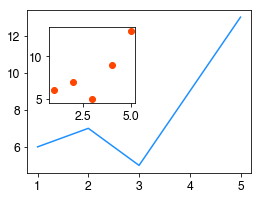

In [11]:
my_fontsize = 12

fig, ax = plt.subplots(1,1)

fig.set_size_inches(4,3)
ax.plot(a, b, c='dodgerblue') # first figure

left, bottom, width, height = 0.2,0.45,0.3,0.35
ax_inset = fig.add_axes([left,bottom,width,height]) # create inset axes
ax_inset.scatter(a, b, c='orangered') # add a plot to inset

ax.tick_params(labelsize=my_fontsize)
ax_inset.tick_params(labelsize=my_fontsize)

fig.savefig('figure_example.png', dpi=300, bbox_inches='tight')